# **Multivariate Linear Regression**
## Note : The Code takes about 12 seconds to execute

The goal of this notebook is to demonstrate a linear regression model from the ground up using numpy.

In [ ]:
%matplotlib inline
from IPython.display import HTML
from numpy import *
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


Downloaded data set to colab from UCI machine learning repository "**QSAR fish toxicity Data Set**"

Number of attributes : 07
Number of instances : 908

In [ ]:
!ls

sample_data


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv","qsar_fish_toxicity.csv")
#x1 = array(qsar_fish_toxicity[:,0])
#x2 = array(qsar_fish_toxicity[:,1])
#x3 = array(qsar_fish_toxicity[:,2])
#x4 = array(qsar_fish_toxicity[:,3])
#x5 = array(qsar_fish_toxicity[:,4])
#x6 = array(qsar_fish_toxicity[:,5])
#y = qsar_fish_toxicity[:, 6]


('qsar_fish_toxicity.csv', <http.client.HTTPMessage at 0x7fe62ad9b510>)

In [ ]:
!ls

qsar_fish_toxicity.csv	sample_data


## Import the data

Here, This is a dataset with **seven(7)** columns was used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. LC50 data, which is the concentration that causes death in 50% of test fish over a test duration of 96 hours, was used as model response. The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH ((atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors). respectively.

In [ ]:
qsar_fish_toxicity = genfromtxt('qsar_fish_toxicity.csv', delimiter=';')
#print(qsar_fish_toxicity)
#Extract coulmns, we have 7 columns


## Defining the hyperparameters

In [ ]:
#define and declaration of hyperparamters
learning_rate = 0.0001
initial_t0 = 0
initial_t1 = 0
initial_t2 = 0
initial_t3 = 0
initial_t4 = 0
initial_t5 = 0
initial_t6 = 0
num_iterations = 1000

## Define the Cost Function

In [ ]:
def compute_cost( t0, t1, t2, t3, t4, t5, t6, qsar_fish_toxicity):
    total_cost = 0
    
    # number of datapoints in training data ,In this scenario N = 908
    N = float(len(qsar_fish_toxicity))
    
    # Compute sum of squared errors
    for i in range(0, len(qsar_fish_toxicity)):
        x1 = qsar_fish_toxicity[i, 0]
        x2 = qsar_fish_toxicity[i, 1]
        x3 = qsar_fish_toxicity[i, 2]
        x4 = qsar_fish_toxicity[i, 3]
        x5 = qsar_fish_toxicity[i, 4]
        x6 = qsar_fish_toxicity[i, 5]
        y = qsar_fish_toxicity[i, 6]
        
        total_cost += (y - (t0 + t1 * x1 + t2 * x2 + t3 * x3 + t4 * x4 + t5 * x5 + t6 * x6)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

## Define Gradient Descent functions

In [ ]:
def step_gradient(t0_current, t1_current, t2_current, t3_current, t4_current, t5_current, t6_current, qsar_fish_toxicity, alpha):
    """takes one step down towards the minima
    
    Args:
        t0_current (float): current value of t0
        t1_current (float): current value of t1
        t2_current (float): current value of t2
        t3_current (float): current value of t3
        t4_current (float): current value of t4
        t5_current (float): current value of t5
        t6_current (float): current value of t6
        qsar_fish_toxicity (np.array): array containing the training data (t0,t1,t2,t3,t4,t5,t6,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (t0,t1,t2,t3,t4,t5,t6) new values of t0,t1,t2,t3,t4,t5,t6
    """
    
    t0_gradient = 0
    t1_gradient = 0
    t2_gradient = 0
    t3_gradient = 0
    t4_gradient = 0
    t5_gradient = 0
    t6_gradient = 0

    N = float(len(qsar_fish_toxicity))

    # Calculate Gradient Function
    for i in range(0, len(qsar_fish_toxicity)):
        x1 = qsar_fish_toxicity[i, 0]
        x2 = qsar_fish_toxicity[i, 1]
        x3 = qsar_fish_toxicity[i, 2]
        x4 = qsar_fish_toxicity[i, 3]
        x5 = qsar_fish_toxicity[i, 4]
        x6 = qsar_fish_toxicity[i, 5]
        y = qsar_fish_toxicity[i, 6]
        
        t0_gradient += - (2/N) * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t1_gradient += - (2/N) * x1 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t2_gradient += - (2/N) * x2 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t3_gradient += - (2/N) * x3 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t4_gradient += - (2/N) * x4 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t5_gradient += - (2/N) * x5 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
        t6_gradient += - (2/N) * x6 * (y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
    
    #(y - (t0_current + t1_current * x1 + t2_current * x2 + t3_current * x3 + t4_current * x4 + t5_current * x5 + t6_current * x6))
    # Update current t0,t1,t2,t3,t4,t5 and t6
    t0_updated = t0_current - alpha * t0_gradient
    t1_updated = t1_current - alpha * t1_gradient
    t2_updated = t2_current - alpha * t2_gradient
    t3_updated = t3_current - alpha * t3_gradient
    t4_updated = t4_current - alpha * t4_gradient
    t5_updated = t5_current - alpha * t5_gradient
    t6_updated = t6_current - alpha * t6_gradient



    #Return updated parameters
    return t0_updated, t1_updated, t2_updated, t3_updated, t4_updated, t5_updated, t6_updated


def gradient_descent(qsar_fish_toxicity, starting_t0, starting_t1, starting_t2, starting_t3, starting_t4, starting_t5, starting_t6, learning_rate, num_iterations):

    """runs gradient descent
    
    Args:
        qsar_fish_toxicity (np.array): training data, containing t0,t1,t2,t3,t4,t5,t6,y
        starting_t0 (float): initial value of t0 (random)
        starting_t1 (float): initial value of t1 (random)
        starting_t2 (float): initial value of t2 (random)
        starting_t3 (float): initial value of t3 (random)
        starting_t4 (float): initial value of t4 (random)
        starting_t5 (float): initial value of t5 (random)
        starting_t6 (float): initial value of t6 (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are t0,t1,t2,t3,t4,t5,t6 respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of t0,t1,t2,t3,t4,t5 and t6  as gradient descent proceeded.
    """

    # initial values
    
    t0 = starting_t0
    t1 = starting_t1
    t2 = starting_t2
    t3 = starting_t3
    t4 = starting_t4
    t5 = starting_t5
    t6 = starting_t6
    
    # to store the cost after each iteration
    cost_graph = []
    
    
    t0_progress = []
    t1_progress = []
    t2_progress = []
    t3_progress = []
    t4_progress = []
    t5_progress = []
    t6_progress = []
    
    # For every iteration, optimize t0,t1,t2,t3,t4,t5,t6  and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost( t0, t1, t2, t3, t4, t5, t6, qsar_fish_toxicity))
        
        t0, t1, t2, t3, t4, t5, t6 = step_gradient(t0, t1, t2, t3, t4, t5, t6, array(qsar_fish_toxicity), learning_rate)
       
        t0_progress.append(t0)
        t1_progress.append(t1)
        t2_progress.append(t2)
        t3_progress.append(t3)
        t4_progress.append(t4)
        t5_progress.append(t5)
        t6_progress.append(t6)
        
        
    
    return [t0, t1, t2, t3, t4, t5, t6, cost_graph, t0_progress, t1_progress, t2_progress, t3_progress, t4_progress, t5_progress, t6_progress]

## Run gradient_descent() to get optimized parameters t0, t1, t2, t3, t4, t5 and t6

In [ ]:

t0, t1, t2, t3, t4, t5, t6, cost_graph, t0_progress, t1_progress, t2_progress, t3_progress, t4_progress, t5_progress, t6_progress = gradient_descent(qsar_fish_toxicity, initial_t0, initial_t1, initial_t2, initial_t3, initial_t4, initial_t5, initial_t6, learning_rate, num_iterations)
#Print optimized parameters

print ('Optimized t0:', t0)
print ('Optimized t1:', t1)
print ('Optimized t2:', t2)
print ('Optimized t3:', t3)
print ('Optimized t4:', t4)
print ('Optimized t5:', t5)
print ('Optimized t6:', t6)



#Print error with optimized parameters

print ('Minimized cost:', compute_cost(t0, t1, t2, t3, t4, t5, t6, qsar_fish_toxicity))


Optimized t0: 0.2377149844428744
Optimized t1: 0.6520488852918811
Optimized t2: 0.1933557478938609
Optimized t3: 0.27235048317118216
Optimized t4: 0.07145504153924973
Optimized t5: 0.12261957647400726
Optimized t6: 0.5598174130857656
Minimized cost: 0.7211288099651326


## Plotting the cost per iterations

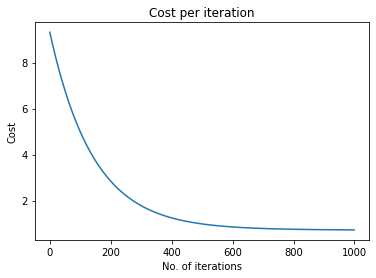

In [ ]:

plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()